In [0]:
#Uncomment line below and run if you need to clear all your resources
#!kill -9 -1

In [1]:
#Configure plots to display inside the notebook
%matplotlib inline

In [2]:
#Imports
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
#path to the data
PATH = "distracted_driver-data/"

#size of the images
sz=224


In [4]:
#Taking a quick peak inside the data/dogscats directory
os.listdir(PATH)

['driver_imgs_list.csv', 'train', 'test']

In [5]:
#Taking a quick peaking inside the validation folder, subfolders names are the labels (categories to classify)
os.listdir(f'{PATH}train')

['c1', 'c3', 'c2', 'c8', 'c7', 'c5', 'c6', 'c4', 'c0', 'c9']

In [6]:
#Selecting a few of the cat images from the validation set
files = os.listdir(f'{PATH}train/c0')[:5]
files

['img_100656.jpg',
 'img_27453.jpg',
 'img_27187.jpg',
 'img_29751.jpg',
 'img_35845.jpg']

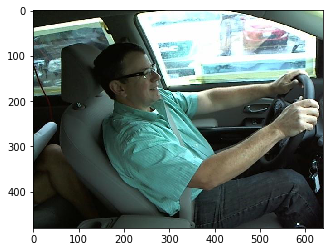

In [7]:
#Displaying one of the cat images, notice that is isn't exactly 224x224
img = plt.imread(f'{PATH}train/c0/{files[0]}')
plt.imshow(img);

In [8]:
img.shape

(480, 640, 3)

In [9]:
import pandas as pd
import random
df = pd.read_csv(PATH + 'driver_imgs_list.csv')


by_drivers = df.groupby('subject')

unique_drivers = list(by_drivers.groups.keys())

train_drivers = unique_drivers[:-6]
valid_drivers = unique_drivers[-6:]






In [10]:
!mkdir distracted_driver-data/valid

In [11]:
!mkdir distracted_driver-data/valid/c0
!mkdir distracted_driver-data/valid/c1
!mkdir distracted_driver-data/valid/c2
!mkdir distracted_driver-data/valid/c3
!mkdir distracted_driver-data/valid/c4
!mkdir distracted_driver-data/valid/c5
!mkdir distracted_driver-data/valid/c6
!mkdir distracted_driver-data/valid/c7
!mkdir distracted_driver-data/valid/c8
!mkdir distracted_driver-data/valid/c9

In [12]:
import os


for index, row in df.iterrows():
    if(row.subject in valid_drivers):
        os.rename("distracted_driver-data/train/"+ row.classname + "/" + row.img, "distracted_driver-data/valid/"+ row.classname + "/" + row.img)
    

In [14]:
!ls distracted_driver-data/train/c0

img_100026.jpg	img_26802.jpg  img_44933.jpg  img_63023.jpg  img_81095.jpg
img_10003.jpg	img_26907.jpg  img_45005.jpg  img_63064.jpg  img_81192.jpg
img_100050.jpg	img_2695.jpg   img_45095.jpg  img_63077.jpg  img_81194.jpg
img_100074.jpg	img_26975.jpg  img_45107.jpg  img_63097.jpg  img_8122.jpg
img_10012.jpg	img_27005.jpg  img_45226.jpg  img_63126.jpg  img_81332.jpg
img_100145.jpg	img_27041.jpg  img_45238.jpg  img_63152.jpg  img_81350.jpg
img_100191.jpg	img_2704.jpg   img_45276.jpg  img_6326.jpg   img_81441.jpg
img_100257.jpg	img_27079.jpg  img_45290.jpg  img_63314.jpg  img_81503.jpg
img_100312.jpg	img_27110.jpg  img_45304.jpg  img_63345.jpg  img_81517.jpg
img_100337.jpg	img_27134.jpg  img_45427.jpg  img_63349.jpg  img_81527.jpg
img_100456.jpg	img_27187.jpg  img_45486.jpg  img_63389.jpg  img_81530.jpg
img_10053.jpg	img_27214.jpg  img_45499.jpg  img_63398.jpg  img_8156.jpg
img_100542.jpg	img_27276.jpg  img_45509.jpg  img_63414.jpg  img_81588.jpg
img_1005.jpg	img_27282.jpg  img_45554.jpg  

In [15]:
!ls distracted_driver-data/valid/c0

img_100598.jpg	img_29055.jpg  img_45932.jpg  img_65494.jpg  img_81340.jpg
img_100796.jpg	img_29306.jpg  img_46484.jpg  img_65547.jpg  img_81383.jpg
img_100828.jpg	img_29350.jpg  img_46818.jpg  img_65674.jpg  img_81396.jpg
img_101196.jpg	img_29357.jpg  img_47184.jpg  img_656.jpg    img_81502.jpg
img_10141.jpg	img_29873.jpg  img_47329.jpg  img_65899.jpg  img_81643.jpg
img_101668.jpg	img_29904.jpg  img_4733.jpg   img_65901.jpg  img_81735.jpg
img_101785.jpg	img_29918.jpg  img_47385.jpg  img_66097.jpg  img_82027.jpg
img_102087.jpg	img_30060.jpg  img_47447.jpg  img_66350.jpg  img_8222.jpg
img_10307.jpg	img_30245.jpg  img_47451.jpg  img_66490.jpg  img_82267.jpg
img_10446.jpg	img_30520.jpg  img_47528.jpg  img_66541.jpg  img_82290.jpg
img_104.jpg	img_31032.jpg  img_47558.jpg  img_66609.jpg  img_82353.jpg
img_10514.jpg	img_31068.jpg  img_48175.jpg  img_66723.jpg  img_82365.jpg
img_1053.jpg	img_31076.jpg  img_48288.jpg  img_66819.jpg  img_82453.jpg
img_10704.jpg	img_31404.jpg  img_48339.jpg  img_

In [17]:
# Uncomment the below if you need to reset your precomputed activations
#shutil.rmtree(f'{PATH}tmp', ignore_errors=True)

In [18]:
#Define our pretrained network architecture
arch=resnet34

#Load our date from disk, images will be nomalized
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

#Create your model from a pretrained (with ImageNet) resenet architecture. Add new fully connected layers at the end.
learn = ConvLearner.pretrained(arch, data, precompute=True)

#Train for 5 epochs with a learning rate of 0.01
learn.fit(0.01, 5)

  0%|          | 0/278 [00:00<?, ?it/s]

/home/ubuntu/anaconda3/lib/python3.6/site-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


100%|██████████| 73/73 [00:09<00:00,  8.05it/s]


epoch      trn_loss   val_loss   accuracy                    
    0      0.371266   2.296371   0.354283  
    1      0.242372   2.707895   0.346319                    
    2      0.180641   2.720302   0.37796                     
    3      0.126992   2.932152   0.359019                    
    4      0.115278   3.093888   0.348472                    



[3.0938881820920106, 0.3484718037149386]

In [19]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(4646, 10)

In [20]:
log_preds[:10]

array([[ -9.44535,  -4.34744,  -7.16899,  -2.44558,  -6.91714, -10.0402 , -10.66852,  -3.71574,  -0.27841,
         -2.14426],
       [ -0.4137 ,  -5.68684,  -8.51341,  -2.19989, -10.69155,  -1.62889,  -9.2075 , -10.78473,  -3.87679,
         -4.90765],
       [ -1.32645,  -4.69652,  -6.79204,  -3.10271,  -6.0995 ,  -4.39206,  -6.46898,  -9.15243,  -0.4267 ,
         -4.55887],
       [ -4.97525,  -5.1511 ,  -5.41697,  -3.09521,  -2.93293,  -2.75281,  -1.69939,  -3.28213,  -1.689  ,
         -0.87813],
       [ -7.48356,  -6.93223,  -5.20397,  -6.34428, -10.37996,  -4.57985,  -7.26939,  -3.33031,  -0.14912,
         -2.48916],
       [-18.17143, -14.65445, -14.75357, -10.67004, -24.65979, -12.97562, -17.2565 , -11.84847,  -0.00004,
        -11.57104],
       [ -1.65227,  -8.60506,  -7.86537,  -1.62109,  -8.95178,  -5.1229 , -10.95568,  -6.62042,  -0.83505,
         -1.77879],
       [ -2.38267,  -7.62104,  -8.20893,  -0.26823,  -8.71358,  -3.32642, -12.6412 ,  -9.08406,  -5.2057 ,
    

In [21]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [22]:
#Reseting the model to show off the learning rate finder
learn = ConvLearner.pretrained(arch, data, precompute=True)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


In [23]:
#Configuring the learning rate finder
lrf=learn.lr_find()

 77%|███████▋  | 215/278 [00:03<00:01, 55.94it/s, loss=5.45]


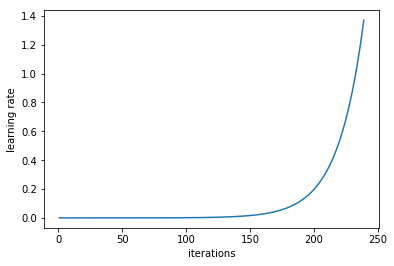

In [24]:
#Plotting the exponential growth of the learning rate
learn.sched.plot_lr()

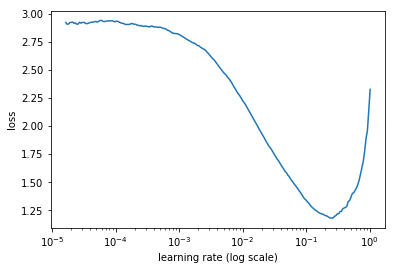

In [25]:
#Plotting loss vs. learning rate, we are interested in the learning rate value just before we hit our minimum loss
learn.sched.plot()

In [26]:
#Next we should explore data augmentation during training
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [27]:
#Method to help us visualize what data augmentation is doing
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [28]:
#Generate 6 augmented version of an image
ims = np.stack([get_augs() for i in range(6)])

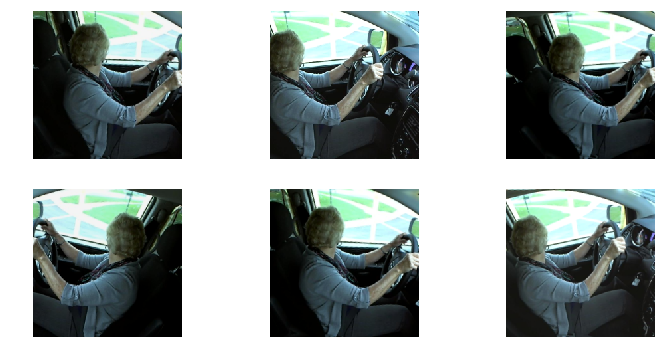

In [29]:
plots(ims, rows=2)

In [30]:
#Now create our data set with data augmentation enabled
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


In [31]:
#Run a single epoch, data augmentation isn't being utilized just yet
learn.fit(1e-2, 2)


epoch      trn_loss   val_loss   accuracy                    
    0      0.371305   1.811999   0.467929  
    1      0.228965   2.205978   0.410891                    



[2.2059775670437887, 0.41089108908966704]

In [32]:
#Now turn precompute off to take advantage of of data augmentation
learn.precompute=False

In [33]:
#Train for 3 more epochs, might be a little slower because were are not precomputing activations
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.676457   1.564644   0.511192  
    1      0.573598   1.507388   0.538528                    
    2      0.519408   1.50918    0.53121                     



[1.5091797650707113, 0.531209642818864]

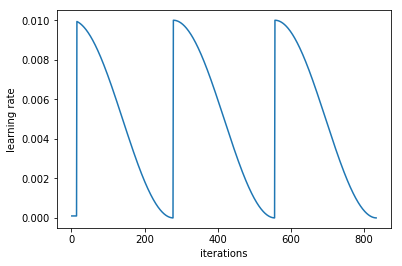

In [34]:
#The cycle_len option above defines how often the learning rate resets (SGDR)
learn.sched.plot_lr()

In [35]:
#Now we may want to train our early layers, so we unfreeze them
learn.unfreeze()

In [36]:
#The network is broken into thirds and we can control the learning rate in each section
lr=np.array([1e-4,1e-3,1e-2])

In [37]:
#Run for a few more epochs, training times will be much slower now that the early layers are being trained
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.147315   0.827317   0.75183   
    1      0.082642   0.810107   0.77443                      
    2      0.055514   0.814902   0.771847                     
    3      0.040571   0.824438   0.767757                     
    4      0.028884   0.764017   0.782178                     
    5      0.019136   0.778723   0.780241                     
    6      0.021981   0.762409   0.785837                     
    7      0.022037   0.845786   0.76991                      
    8      0.016315   0.770231   0.785837                     
    9      0.01192    0.78639    0.777012                     
    10     0.009513   0.799205   0.775936                      
    11     0.010416   0.819227   0.776797                      
    12     0.006902   0.817293   0.775291                      
    13     0.007601   0.830012   0.778089                      
    14     0.006659   0.817584   0.776367                      
    15 

[0.887188640381825, 0.7727077054890178]

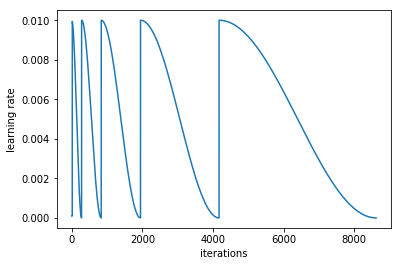

In [38]:
#Notice that the learning rate restarts are not happening at the epoch boundaries (resutl of cycle_mult parameter)
learn.sched.plot_lr()

In [39]:
#We can one more thing to improve our accuracy, Test Time Augmentation (TTA)
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [40]:
#Final accuracy
accuracy_np(probs, y)

0.7675419715884632

In [41]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [42]:
#Now we can visualize our results
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[291   4   2  46   1  22   0   4  90  80]
 [  1 387  14   1   0   1   0   1  68  22]
 [  0   0 423   0   0   0   0   4  48  12]
 [ 17   0   0 408   2   0   0   0  32   1]
 [ 20   0   8  11 357   0   0   0  66   5]
 [  5   0  15   0   0 393   0   2  17   1]
 [  0  17  20   0   0   0 394   0  32   0]
 [  0   1   1   0   0   0   0 308  90   5]
 [  0   9   8   0   0   0   4  44 371   1]
 [ 59   7   1  12   1  10   0  16 119 234]]


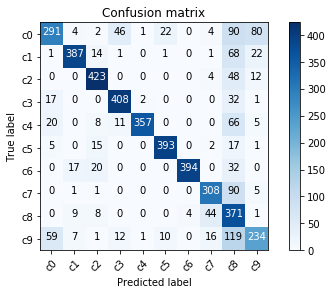

In [43]:

plot_confusion_matrix(cm, data.classes)

In [0]:
!rm -r distracted_driver-data